In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datasets import load_dataset

df = pd.read_csv('D:\python practice/Data Analytics/Real Dataset Practice/Mobile phone Classification/files/test.csv')

In [23]:
df_t = df.copy()

In [89]:
# Converting the columns to yes or no

col_to_convert = ['four_g','three_g','touch_screen','wifi']
for cols in col_to_convert:
    df_t[cols] = df_t[cols].replace({1:'Yes',0:'No'})

In [90]:
df_t.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,No,5,0.1,193,...,16,226,1412,3476,12,7,2,No,Yes,No
1,2,841,1,0.5,1,4,Yes,61,0.8,191,...,12,746,857,3895,6,0,7,Yes,No,No
2,3,1807,1,2.8,0,1,No,27,0.9,186,...,4,1270,1366,2396,17,10,10,No,Yes,Yes
3,4,1546,0,0.5,1,18,Yes,25,0.5,96,...,20,295,1752,3893,10,0,7,Yes,Yes,No
4,5,1434,0,1.4,0,11,Yes,49,0.5,108,...,18,749,810,1773,15,8,7,Yes,No,Yes


In [83]:
columns_needed = [
    'battery_power',
    'ram',
    'int_memory',
    'px_height',
    'px_width'
]

df_plot = df_t[columns_needed].groupby(df['battery_power']).median().head(20)
df_plot

,battery_power,ram,int_memory,px_height,px_width
battery_power,,,,,
500,500.0,3133.5,46.0,1197.0,1883.0
504,504.0,3455.0,63.0,463.0,1609.0
507,507.0,2884.0,33.0,535.0,897.0
510,510.0,2187.0,15.0,268.0,1505.0
511,511.0,3370.0,43.0,1291.0,1583.0
517,517.0,2747.0,38.0,680.0,1138.0
518,518.0,1723.5,31.0,564.0,752.0
519,519.0,1231.0,33.0,527.0,1527.0
520,520.0,3616.0,44.0,12.0,914.0


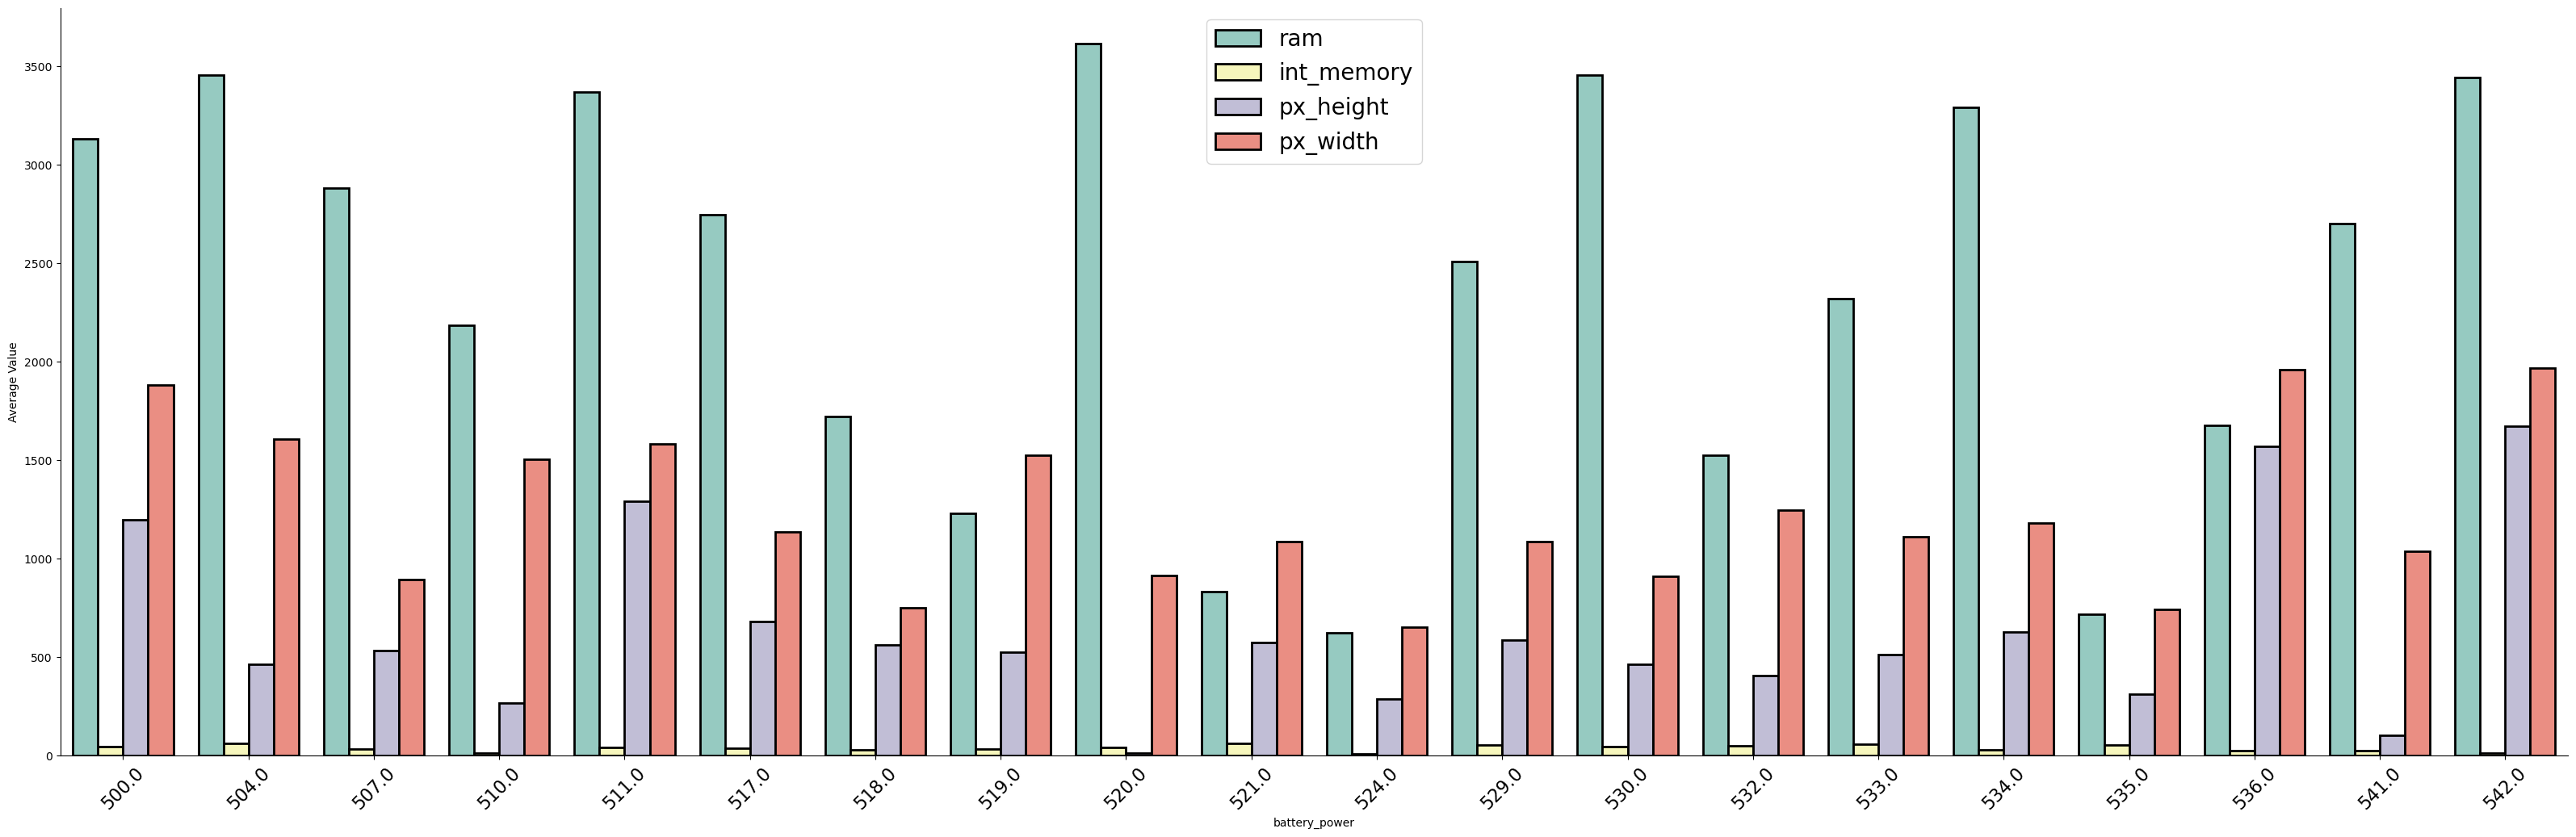

In [84]:
#Plotting the graph for Visualization
df_melted = df_plot.melt(id_vars='battery_power', var_name='Feature', value_name='Average Value')

plt.figure(figsize=(32, 10))
sns.barplot(
    data=df_melted,
    x='battery_power',
    y='Average Value',
    hue='Feature',
    palette='Set3',
    edgecolor = 'black',
    linewidth=2
)
sns.despine()
plt.tight_layout()
plt.legend(fontsize=20)
plt.xticks(rotation=45,fontsize=16)
plt.show()